In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.constraints import max_norm, MinMaxNorm

Using TensorFlow backend.


In [2]:
def func1(x):
    return x**2*(np.abs(x)<=2) + 4*(np.abs(x)>2)

def func2(x):
    return - x**2*(np.abs(x)<=2) - 4*(np.abs(x)>2)
    
    
Xtest = np.arange(-5, 5, 0.1)
Ytest1 = func1(Xtest)
Ytest2 = func2(Xtest)

Xlearn = np.random.uniform(-5, 5, size=(200))
Ylearn1 = func1(Xlearn) + 0.1*np.random.normal(0,1,len(Xlearn))
Ylearn2 = func2(Xlearn) + 0.1*np.random.normal(0,1,len(Xlearn))

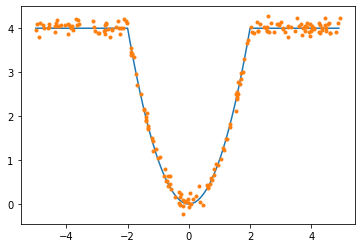

In [3]:
plt.plot(Xtest, Ytest1)
plt.plot(Xlearn, Ylearn1, '.', label='Raw input data with noise')
plt.show()

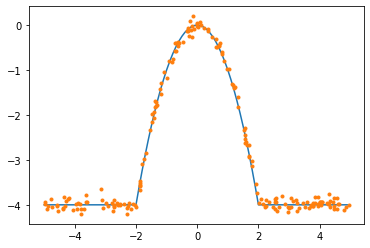

In [4]:
plt.plot(Xtest, Ytest2)
plt.plot(Xlearn, Ylearn2, '.', label='Raw input data with noise')
plt.show()

In [18]:
model1 = Sequential()
model1.add(Dense(8, input_dim=1, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(keras.layers.Dropout(0.2))
model1.add(Dense(128, activation='relu'))
model1.add(keras.layers.Dropout(0.2))
model1.add(Dense(1, activation='linear'))
model1.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [19]:
nepoch = 100
nbatch = 10
model1.fit(Xlearn, Ylearn1, epochs=nepoch, batch_size=nbatch)

Epoch 1/100
200/200 [==============================] - 0s 2ms/step - loss: 4.5973 - mean_squared_error: 4.5973
Epoch 2/100
200/200 [==============================] - 0s 193us/step - loss: 1.0099 - mean_squared_error: 1.0099
Epoch 3/100
200/200 [==============================] - 0s 166us/step - loss: 0.7728 - mean_squared_error: 0.7728
Epoch 4/100
200/200 [==============================] - 0s 183us/step - loss: 0.8076 - mean_squared_error: 0.8076
Epoch 5/100
200/200 [==============================] - 0s 191us/step - loss: 0.7858 - mean_squared_error: 0.7858
Epoch 6/100
200/200 [==============================] - 0s 148us/step - loss: 0.7444 - mean_squared_error: 0.7444
Epoch 7/100
200/200 [==============================] - 0s 167us/step - loss: 0.8031 - mean_squared_error: 0.8031
Epoch 8/100
200/200 [==============================] - 0s 144us/step - loss: 0.7357 - mean_squared_error: 0.7357
Epoch 9/100
200/200 [==============================] - 0s 165us/step - loss: 0.7665 - mean_squared

Epoch 73/100
200/200 [==============================] - 0s 213us/step - loss: 0.1049 - mean_squared_error: 0.1049
Epoch 74/100
200/200 [==============================] - 0s 210us/step - loss: 0.1189 - mean_squared_error: 0.1189
Epoch 75/100
200/200 [==============================] - 0s 213us/step - loss: 0.1181 - mean_squared_error: 0.1181
Epoch 76/100
200/200 [==============================] - 0s 205us/step - loss: 0.1103 - mean_squared_error: 0.1103
Epoch 77/100
200/200 [==============================] - 0s 262us/step - loss: 0.0971 - mean_squared_error: 0.0971
Epoch 78/100
200/200 [==============================] - 0s 221us/step - loss: 0.1008 - mean_squared_error: 0.1008
Epoch 79/100
200/200 [==============================] - 0s 331us/step - loss: 0.1065 - mean_squared_error: 0.1065
Epoch 80/100
200/200 [==============================] - 0s 149us/step - loss: 0.1149 - mean_squared_error: 0.1149
Epoch 81/100
200/200 [==============================] - 0s 190us/step - loss: 0.1019 - m

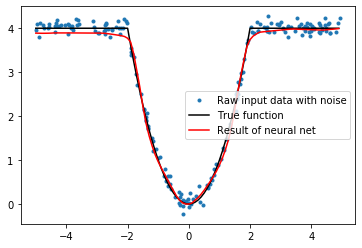

In [7]:
Ylearned1 = model1.predict(Xtest)

plt.plot(Xlearn, Ylearn1, '.', label='Raw input data with noise')
plt.plot(Xtest, Ytest1, label='True function', c='black')
plt.plot(Xtest, Ylearned1, label='Result of neural net', c='red')
plt.legend()

In [15]:
model2 = Sequential()
model2.add(Dense(8, input_dim=1, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(keras.layers.Dropout(0.2))
model2.add(Dense(128, activation='relu'))
model2.add(keras.layers.Dropout(0.2))
model2.add(Dense(1, activation='linear'))
model2.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [16]:
nepoch = 100
nbatch = 10
model2.fit(Xlearn, Ylearn2, epochs=nepoch, batch_size=nbatch)

Epoch 1/100
200/200 [==============================] - 0s 2ms/step - loss: 7.8293 - mean_squared_error: 7.8293
Epoch 2/100
200/200 [==============================] - 0s 164us/step - loss: 1.7964 - mean_squared_error: 1.7964
Epoch 3/100
200/200 [==============================] - 0s 139us/step - loss: 0.8496 - mean_squared_error: 0.8496
Epoch 4/100
200/200 [==============================] - 0s 130us/step - loss: 0.7783 - mean_squared_error: 0.7783
Epoch 5/100
200/200 [==============================] - 0s 137us/step - loss: 0.7531 - mean_squared_error: 0.7531
Epoch 6/100
200/200 [==============================] - 0s 137us/step - loss: 0.6557 - mean_squared_error: 0.6557
Epoch 7/100
200/200 [==============================] - 0s 147us/step - loss: 0.6591 - mean_squared_error: 0.6591
Epoch 8/100
200/200 [==============================] - 0s 180us/step - loss: 0.5538 - mean_squared_error: 0.5538
Epoch 9/100
200/200 [==============================] - 0s 155us/step - loss: 0.6175 - mean_squared

Epoch 73/100
200/200 [==============================] - 0s 166us/step - loss: 0.1008 - mean_squared_error: 0.1008
Epoch 74/100
200/200 [==============================] - 0s 215us/step - loss: 0.0799 - mean_squared_error: 0.0799
Epoch 75/100
200/200 [==============================] - 0s 205us/step - loss: 0.1083 - mean_squared_error: 0.1083
Epoch 76/100
200/200 [==============================] - 0s 296us/step - loss: 0.0933 - mean_squared_error: 0.0933
Epoch 77/100
200/200 [==============================] - 0s 239us/step - loss: 0.1019 - mean_squared_error: 0.1019
Epoch 78/100
200/200 [==============================] - 0s 153us/step - loss: 0.0871 - mean_squared_error: 0.0871
Epoch 79/100
200/200 [==============================] - 0s 192us/step - loss: 0.0873 - mean_squared_error: 0.0873
Epoch 80/100
200/200 [==============================] - 0s 217us/step - loss: 0.1138 - mean_squared_error: 0.1138
Epoch 81/100
200/200 [==============================] - 0s 211us/step - loss: 0.1114 - m

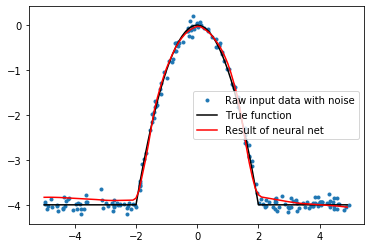

In [20]:
Ylearned2 = model2.predict(Xtest)

plt.plot(Xlearn, Ylearn2, '.', label='Raw input data with noise')
plt.plot(Xtest, Ytest2, label='True function', c='black')
plt.plot(Xtest, Ylearned2, label='Result of neural net', c='red')
plt.legend()